In [1]:
# -*- coding: utf8 -*-
import pandas as pd
import pickle, random
import yaml

In [2]:
million=1000000
nbMillions=200
nTiles=10
lexiquePrefix="MGC-160104"
tiragePrefix="MGC-160628"
echantillon="-%dMo"%nbMillions

In [3]:
with open("/Users/gilles/ownCloud/Recherche/Boye/2015-Data/"+lexiquePrefix+'-Verbes2.pkl', 'rb') as input:
    lexique = pickle.load(input)

In [4]:
lexique["freqcum"]= (lexique["freq"].cumsum()*1000).astype(int)

In [5]:
rangeTop=lexique["freqcum"].max()

In [6]:
del lexique["ext"]
del lexique["cs"]
del lexique["ms"]
del lexique["vs"]
del lexique["prob"]

In [7]:
%%time
tirage=[]
for n in range(nbMillions*million):
    tirage.append(random.randrange(rangeTop))

CPU times: user 9min 53s, sys: 35.8 s, total: 10min 29s
Wall time: 10min 59s


In [8]:
with open("/Users/gilles/ownCloud/Recherche/Boye/2015-Data/"+tiragePrefix+echantillon+'-Liste.pkl', 'w') as output:
    pickle.dump(tirage, output, pickle.HIGHEST_PROTOCOL)

In [9]:
lexique["tir1"]=0

In [10]:
%%time
def tirage2triage(tirage):    
    triage=sorted(tirage)
    freqTop=0
    indexMin=0
    tirs={}

    for num,tir in enumerate(triage[:]):
        if tir > freqTop:
            indexMin=lexique[lexique["freqcum"]>=tir][0:1].index.astype(int)[0]
            freqTop=lexique.ix[indexMin,'freqcum']
            tirs[indexMin]=0
        tirs[indexMin] += 1
        if num%500000==0:
            print num,
    for indexNum in tirs:
        lexique.ix[indexNum,'tir1']+=tirs[indexNum]

CPU times: user 9 µs, sys: 14 µs, total: 23 µs
Wall time: 57 µs


In [11]:
portion=(nbMillions*million)//nTiles
print portion

20000000


In [12]:
for nTile in range(nTiles):
    %time tirage2triage(tirage[nTile*portion:(nTile+1)*portion])
    print
    print "nTile",nTile
    print lexique[lexique["tir1"]!=0]["tir1"].sum()
    print lexique[lexique["tir1"]!=0]["tir1"].count()
    

0 500000 1000000 1500000 2000000 2500000 3000000 3500000 4000000 4500000 5000000 5500000 6000000 6500000 7000000 7500000 8000000 8500000 9000000 9500000 10000000 10500000 11000000 11500000 12000000 12500000 13000000 13500000 14000000 14500000 15000000 15500000 16000000 16500000 17000000 17500000 18000000 18500000 19000000 19500000CPU times: user 26min 18s, sys: 4min 19s, total: 30min 37s
Wall time: 30min 58s

nTile 0
20000000
70819
0 500000 1000000 1500000 2000000 2500000 3000000 3500000 4000000 4500000 5000000 5500000 6000000 6500000 7000000 7500000 8000000 8500000 9000000 9500000 10000000 10500000 11000000 11500000 12000000 12500000 13000000 13500000 14000000 14500000 15000000 15500000 16000000 16500000 17000000 17500000 18000000 18500000 19000000 19500000CPU times: user 25min 42s, sys: 4min, total: 29min 43s
Wall time: 29min 49s

nTile 1
40000000
72445
0 500000 1000000 1500000 2000000 2500000 3000000 3500000 4000000 4500000 5000000 5500000 6000000 6500000 7000000 7500000 8000000 850

In [13]:
with open("/Users/gilles/ownCloud/Recherche/Boye/2015-Data/"+tiragePrefix+echantillon+'-Tirage.pkl', 'wb') as output:
    pickle.dump(lexique, output, pickle.HIGHEST_PROTOCOL)

In [ ]:
print lexique[lexique["tir1"]!=0]["tir1"].sum()
print lexique[lexique["tir1"]!=0]["tir1"].count()

# Graphes des nombres de formes pour n tirages

In [19]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [41]:
#ligneComp={200000:75000,400000:75000,600000:75000,800000:75000,1000000:75000,1200000:75000,1400000:75000,1600000:75000,1800000:75000,2000000:75000,4000000:75000,6000000:75000,8000000:75000,10000000:75000,12000000:75000,14000000:75000,16000000:75000,18000000:75000,20000000:75000,40000000:75000,60000000:75000,80000000:75000,100000000:75000,120000000:75000,140000000:75000,160000000:75000,180000000:75000,200000000:75000}
#tirageNbFormes={200000:23278,400000:31402,600000:36586,800000:40411,1000000:43439,1200000:45894,1400000:47978,1600000:49753,1800000:51308,2000000:52615,4000000:60781,6000000:64536,8000000:66693,10000000:68046,12000000:68984,14000000:69683,16000000:70152,18000000:70560,20000000:70849,40000000:72445,60000000:73137,80000000:73551,100000000:73840,120000000:74070,140000000:74242,160000000:74395,180000000:74561,200000000:74702}
ligneComp={200:75000,400:75000,600:75000,800:75000,1000:75000,1200:75000,1400:75000,1600:75000,1800:75000,2000:75000,4000:75000,6000:75000,8000:75000,10000:75000,12000:75000,14000:75000,16000:75000,18000:75000,20000:75000,40000:75000,60000:75000,80000:75000,100000:75000,120000:75000,140000:75000,160000:75000,180000:75000,200000:75000}
tirageNbFormes={200:23278,400:31402,600:36586,800:40411,1000:43439,1200:45894,1400:47978,1600:49753,1800:51308,2000:52615,4000:60781,6000:64536,8000:66693,10000:68046,12000:68984,14000:69683,16000:70152,18000:70560,20000:70849,40000:72445,60000:73137,80000:73551,100000:73840,120000:74070,140000:74242,160000:74395,180000:74561,200000:74702}

In [49]:
nbForms=pd.Series(tirageNbFormes)
nbFixe=pd.Series(ligneComp)

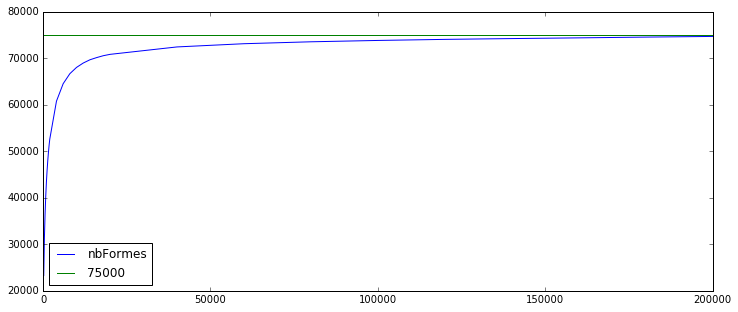

In [83]:
tableauTirageNbFormes=pd.concat([nbForms,nbFixe],axis=1)
tableauTirageNbFormes.columns=["nbFormes","75000"]
tableauTirageNbFormes.plot(figsize=(12,5),xticks=np.arange(0,250000,50000))
plt.savefig("/Users/gilles/ownCloud/Recherche/Boye/2015-Data/"+tiragePrefix+echantillon+'-Tirage.pdf')

In [175]:
nbMillions=1
echantillon="-%dMo"%nbMillions

In [176]:
with open("/Users/gilles/ownCloud/Recherche/Boye/2015-Data/"+tiragePrefix+echantillon+'-Tirage.pkl', 'r') as input:
    tiragesLexique = pickle.load(input)

In [177]:
echantillonLexique=tiragesLexique[tiragesLexique["tir1"]>0]

In [178]:
echantillonLexique
paradigmes=pd.pivot_table(echantillonLexique, values='phono', index=['lexeme'], columns=['case'], aggfunc=lambda x: ",".join(x)).reset_index().reindex()

In [181]:
paradigmes.dropna(thresh=51)["lexeme"].tolist()

[]

In [180]:
paradigmes.dropna(thresh=48)["lexeme"].tolist()

[u'avoir', u'faire', u'savoir', u'\xeatre']

In [190]:
print len(paradigmes),len(echantillonLexique), len(tiragesLexique), 100*float(len(echantillonLexique))/len(tiragesLexique)

4584 43468 328103 13.2482787417


In [187]:
paradigmes["nbFormes"]=(paradigmes.count(axis=1)-1)

In [188]:
nbVerbes=pd.DataFrame(columns=["nbFormes","nbVerbes"])

In [191]:
nbVerbes.loc[0]=["0",6561-len(paradigmes)]
for i in range(51):
    nbVerbes.loc[i+1]=[str(i+1),len(paradigmes[paradigmes["nbFormes"]==i+1])]

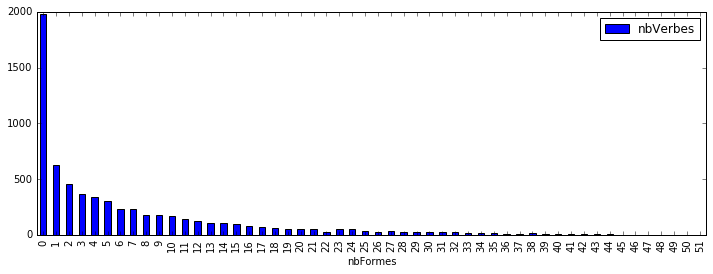

In [192]:
nbVerbes.plot(kind='bar',x="nbFormes",figsize=(12,4))
plt.savefig("/Users/gilles/ownCloud/Recherche/Boye/2015-Data/"+tiragePrefix+echantillon+'-nbVerbes.pdf')

In [163]:
paradigmes

case,lexeme,ai1P,ai1S,ai2P,ai2S,ai3P,ai3S,fi1P,fi1S,fi2P,...,ppFS,ppMP,ppMS,ps1P,ps1S,ps2P,ps2S,ps3P,ps3S,nbFormes
0,abaisser,NaN,abEsE,NaN,NaN,abEsEr,abEsa,NaN,abEs6rE,NaN,...,abEse,abEse,abEse,NaN,NaN,NaN,NaN,NaN,NaN,25
1,abandonner,abâdOnam,abâdOnE,NaN,abâdOna,abâdOnEr,abâdOna,abâdOn6rô,abâdOn6rE,abâdOn6re,...,abâdOne,abâdOne,abâdOne,NaN,NaN,NaN,abâdOn,abâdOn,abâdOn,42
2,abasourdir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,abazurdi,abazurdi,abazurdi,NaN,NaN,NaN,NaN,NaN,NaN,5
3,abattre,NaN,abati,NaN,NaN,abatir,abati,abatrô,abatrE,abatre,...,abaty,abaty,abaty,NaN,abat,NaN,abat,abat,abat,38
4,abdiquer,NaN,abdikE,NaN,NaN,NaN,abdika,NaN,NaN,NaN,...,abdike,NaN,abdike,NaN,NaN,NaN,NaN,NaN,NaN,17
5,aberrer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,abhorrer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,abOre,abOre,abOre,NaN,NaN,NaN,NaN,NaN,NaN,10
7,abjurer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,abZyre,NaN,NaN,NaN,NaN,NaN,NaN,9
8,abolir,NaN,NaN,NaN,NaN,NaN,abOli,NaN,NaN,NaN,...,abOli,abOli,abOli,abOlisjô,NaN,NaN,NaN,NaN,NaN,20
9,abonder,NaN,abôdE,NaN,NaN,NaN,abôda,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11


In [156]:
paradigmes[paradigmes["lexeme"]=="aberrer"].values

array([[u'aberrer', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, u'abEr\xe2', nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, 1]], dtype=object)